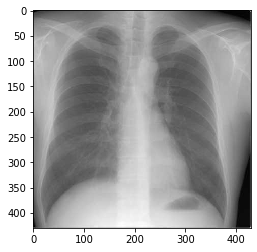

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

img=cv2.imread('chest-xray.jpg',0)
# display the image
plt.imshow(img, cmap='gray')

(array([  328.,  1704.,  1033.,   153.,   105.,    99.,   142.,   149.,
          163.,   238.,   428.,   342.,   380.,   409.,   585.,  2095.,
         4526.,  7019., 10447.,  9877., 10859.,  8318.,  6747.,  6059.,
         5610.,  6126.,  5148.,  4970.,  4908.,  4911.,  6779.,  6874.,
         7282.,  7343.,  9660.,  7844.,  7443.,  5554.,  4237.,  2656.,
         3190.,  2441.,  2074.,  2066.,  1745.,  1265.,  1043.,   819.,
          461.,   246.]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
        229.5, 234.6, 239.7, 244.8, 249.9, 255. ]),
 <a list of 50 Patch objects>)

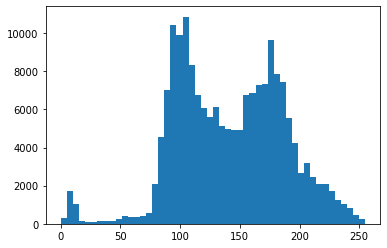

In [3]:
# convert image into a numpy array
img = np.asarray(img)
# put pixels in a 1D array by flattening out img array
flat = img.flatten()

# show the histogram
plt.hist(flat, bins=50)

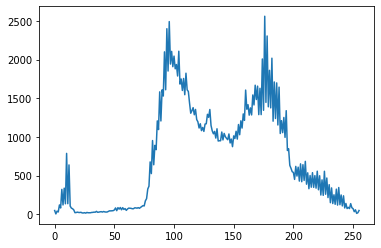

In [7]:
# create our own histogram function
def get_histogram(image, bins):
    # array with size of bins, set to zeros
    histogram = np.zeros(bins)
    
    # loop through pixels and sum up counts of pixels
    for pixel in image:
        histogram[pixel] += 1
    
    # return our final result
    return histogram

hist = get_histogram(flat, 256)

plt.plot(hist)

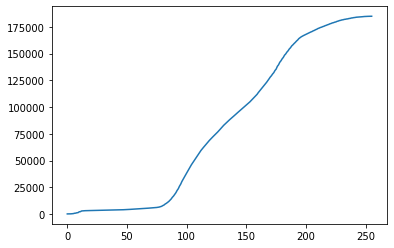

In [17]:
# create our cumulative sum function
def cumsum(a):
    a = iter(a)
    b = [next(a)]
    for i in a:
        b.append(b[-1] + i)
    return np.array(b)

# execute the fn
cs = cumsum(hist)

# display the result
plt.plot(cs)


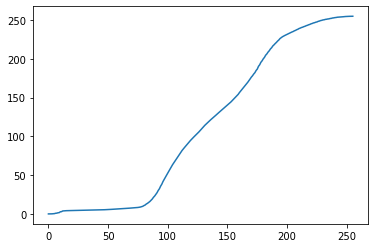

In [18]:
# re-normalize cumsum values to be between 0-255
# numerator & denomenator
nj = (cs - cs.min()) * 255
N = cs.max() - cs.min()

# re-normalize the cdf
cs = nj / N

plt.plot(cs)

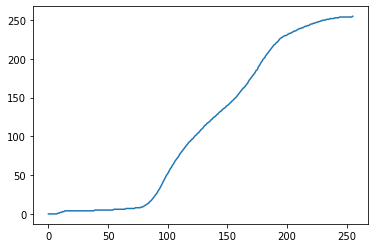

In [19]:
# cast it back to uint8 since we can't use floating point values in images
cs = cs.astype('uint8')

plt.plot(cs)

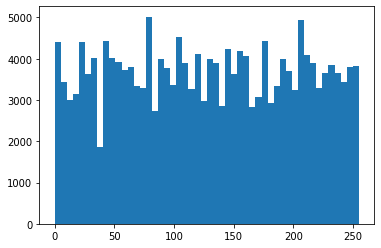

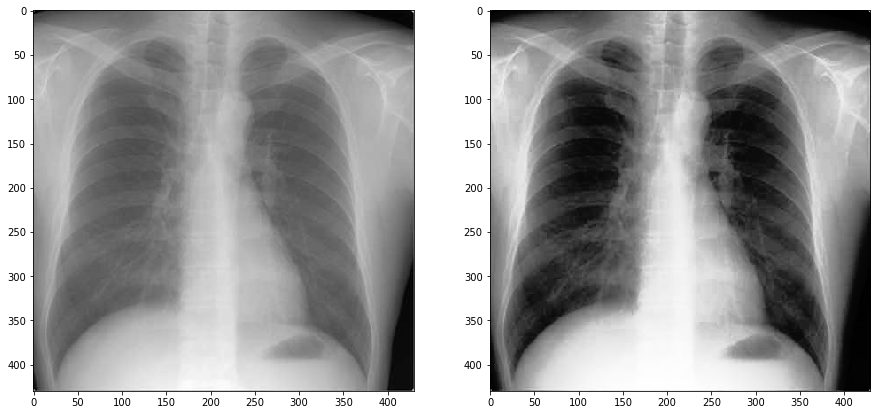

In [23]:
# get the value from cumulative sum for every index in flat, and set that as img_new
img_new = cs[flat]

# we see a much more evenly distributed histogram
plt.hist(img_new, bins=50)
# put array back into original shape since we flattened it
img_new = np.reshape(img_new, img.shape)
# set up side-by-side image display
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(img, cmap='gray')

# display the new image
fig.add_subplot(1,2,2)
plt.imshow(img_new, cmap='gray')

plt.show(block=True)

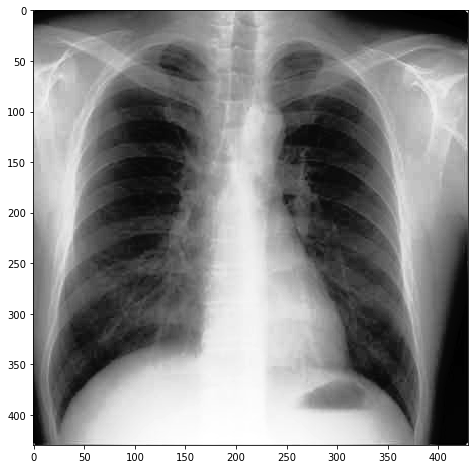

In [29]:
equ = cv2.equalizeHist(img)
#res = np.hstack((img,equ)) #stacking images side-by-side
plt.figure(figsize=(8,8))
plt.imshow(equ,cmap='gray')